# From Excel to Pandas: Advanced Data Analysis Techniques

Excel is a powerful tool for data analysis, but when it comes to handling large datasets and performing complex operations, Python's pandas library offers superior capabilities. In this notebook, we'll explore advanced Excel features and demonstrate their pandas equivalents, focusing on pivot tables, charts, groupbys, and joins.

## Generating a Random Sales Dataset

We'll create a random dataset to simulate sales data, which we'll use to demonstrate the advanced features.

In [1]:

import pandas as pd
import numpy as np
from faker import Faker
import random
import matplotlib.pyplot as plt


pd.set_option("display.notebook_repr_html", False)


In [2]:
# Initialize Faker
fake = Faker()

# Set the random seed for reproducibility
Faker.seed(0)
np.random.seed(0)
random.seed(0)

# Generate random data
num_records = 100000
data = {
    "Order ID": np.arange(1, num_records + 1),
    "Order Date": [fake.date_between(start_date='-1y', end_date='today') for _ in range(num_records)],
    "Customer Name": [fake.name() for _ in range(num_records)],
    "Segment": np.random.choice(["Consumer", "Corporate", "Home Office"], num_records),
    "Category": np.random.choice(["Furniture", "Office Supplies", "Technology"], num_records),
    "Sub-Category": np.random.choice(["Bookcases", "Chairs", "Tables", "Accessories", "Appliances", "Art", "Binders", "Envelopes", "Fasteners", "Labels", "Paper", "Storage", "Supplies", "Phones", "Copiers", "Machines"], num_records),
    "Sales": np.round(np.random.uniform(10.0, 1000.0, num_records), 2),
    "Quantity": np.random.randint(1, 10, num_records),
    "Discount": np.round(np.random.uniform(0.0, 0.3, num_records), 2),
    "Profit": np.round(np.random.uniform(-200.0, 200.0, num_records), 2)
}

# Create a DataFrame
df = pd.DataFrame(data)

# Convert 'Order Date' to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Preview the DataFrame
display(df.head())

   Order ID Order Date       Customer Name    Segment         Category  \
0         1 2024-09-06      Jeffrey Torres   Consumer       Technology   
1         2 2024-03-12  Mrs. Jennifer King  Corporate        Furniture   
2         3 2024-08-04      Kimberly Payne   Consumer  Office Supplies   
3         4 2024-09-24         Paula Brady  Corporate        Furniture   
4         5 2024-03-26      Jessica Archer  Corporate  Office Supplies   

  Sub-Category   Sales  Quantity  Discount  Profit  
0       Tables  130.30         9      0.18   84.39  
1     Supplies  196.84         4      0.19  100.31  
2    Fasteners  118.06         2      0.12  102.62  
3    Fasteners  355.70         7      0.07  -58.91  
4          Art  898.85         6      0.05  169.42  

## 1. Pivot Tables

### **Excel Equivalent**
In Excel, you can create a pivot table to summarize sales by category and segment.

### **Pandas Equivalent**

In [3]:
# Updated code without the FutureWarning
pivot_table = pd.pivot_table(
    df,
    values='Sales',
    index=['Category'],
    columns=['Segment'],
    aggfunc='sum',
    margins=True,
    margins_name='Total'
)

print(pivot_table)

Segment             Consumer    Corporate  Home Office        Total
Category                                                           
Furniture         5594767.38   5537224.51   5606353.76  16738345.65
Office Supplies   5574308.71   5628310.98   5602843.59  16805463.28
Technology        5625510.40   5628158.84   5573417.03  16827086.27
Total            16794586.49  16793694.33  16782614.38  50370895.20


## 2. GroupBy Operations

### **Excel Equivalent**
Using SUMIF or array formulas to calculate total profit by category.

### **Pandas Equivalent**

In [4]:
# Group by 'Category' and calculate total profit
category_profit = df.groupby('Category')['Profit'].sum().reset_index()
category_profit

          Category    Profit
0        Furniture  27327.19
1  Office Supplies -13836.24
2       Technology  14366.78

## 3. Merging and Joining Data

### **Excel Equivalent**
Using VLOOKUP or INDEX-MATCH to combine data from different sheets.

### **Pandas Equivalent**
Let's assume we have another DataFrame with customer information.

In [5]:
# Create a customer DataFrame
customer_data = {
    "Customer Name": df['Customer Name'].unique(),
    "Region": np.random.choice(["East", "West", "Central", "South"], len(df['Customer Name'].unique())),
    "Customer Segment": np.random.choice(["High Value", "Medium Value", "Low Value"], len(df['Customer Name'].unique()))
}
customers = pd.DataFrame(customer_data)
customers.head()

        Customer Name Region Customer Segment
0      Jeffrey Torres  South       High Value
1  Mrs. Jennifer King   West        Low Value
2      Kimberly Payne   West       High Value
3         Paula Brady   East        Low Value
4      Jessica Archer   East        Low Value

In [6]:
# Merge the sales data with customer data
merged_df = pd.merge(df, customers, on='Customer Name', how='left')
merged_df.head()

   Order ID Order Date       Customer Name    Segment         Category  \
0         1 2024-09-06      Jeffrey Torres   Consumer       Technology   
1         2 2024-03-12  Mrs. Jennifer King  Corporate        Furniture   
2         3 2024-08-04      Kimberly Payne   Consumer  Office Supplies   
3         4 2024-09-24         Paula Brady  Corporate        Furniture   
4         5 2024-03-26      Jessica Archer  Corporate  Office Supplies   

  Sub-Category   Sales  Quantity  Discount  Profit Region Customer Segment  
0       Tables  130.30         9      0.18   84.39  South       High Value  
1     Supplies  196.84         4      0.19  100.31   West        Low Value  
2    Fasteners  118.06         2      0.12  102.62   West       High Value  
3    Fasteners  355.70         7      0.07  -58.91   East        Low Value  
4          Art  898.85         6      0.05  169.42   East        Low Value  

## 4. Data Visualization (Charts)

### **Excel Equivalent**
Creating charts to visualize sales trends over time.

### **Pandas/Matplotlib Equivalent**

C:\Users\AlexanderMolinar\AppData\Local\Temp\ipykernel_41872\3861109624.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df.set_index('Order Date').resample('M')['Sales'].sum()


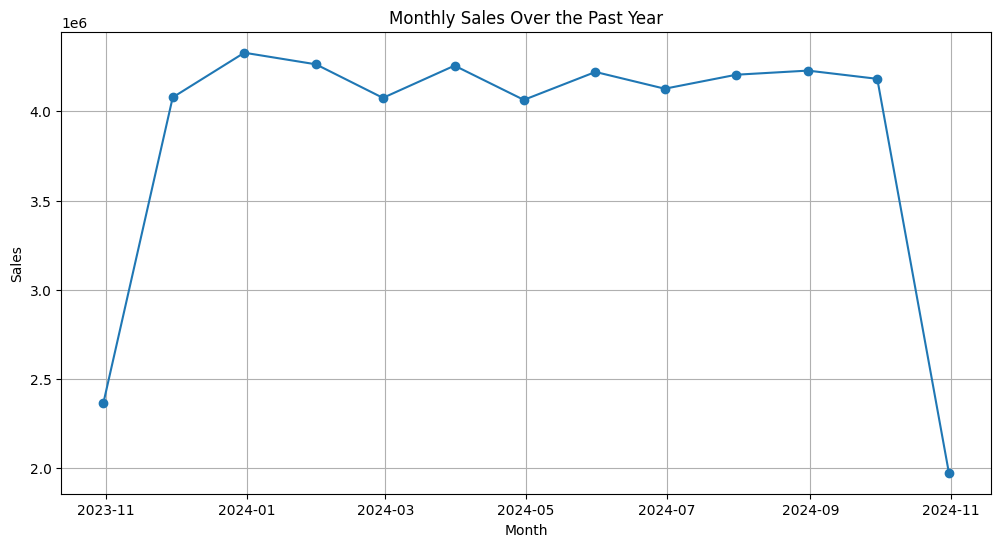

In [7]:
# Calculate monthly sales
monthly_sales = df.set_index('Order Date').resample('M')['Sales'].sum()

# Plot the monthly sales
plt.figure(figsize=(12,6))
plt.plot(monthly_sales.index, monthly_sales.values, marker='o')
plt.title('Monthly Sales Over the Past Year')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.grid(True)
plt.show()

## 5. Advanced GroupBy with Multiple Aggregations

### **Excel Equivalent**
Using Pivot Tables with multiple value fields and custom calculations.

### **Pandas Equivalent**

In [8]:
# Group by 'Category' and 'Sub-Category' and calculate total Sales and Profit
grouped = df.groupby(['Category', 'Sub-Category']).agg({'Sales': 'sum', 'Profit': 'sum'}).reset_index()
grouped.head()

    Category Sub-Category       Sales   Profit
0  Furniture  Accessories  1058604.06  4045.37
1  Furniture   Appliances  1054785.39  4191.92
2  Furniture          Art  1034452.53 -8202.14
3  Furniture      Binders  1037405.95  3796.30
4  Furniture    Bookcases  1047625.21 -1685.37

## 6. Applying Custom Functions with GroupBy

### **Excel Equivalent**
Using array formulas or VBA scripts to apply custom calculations.

### **Pandas Equivalent**

In [9]:
# Define a custom function to calculate profit margin
def profit_margin(x):
    return (x['Profit'].sum() / x['Sales'].sum()) * 100

# Apply the custom function
margin = df.groupby('Category').apply(profit_margin).reset_index(name='Profit Margin (%)')
margin

C:\Users\AlexanderMolinar\AppData\Local\Temp\ipykernel_41872\1944146675.py:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  margin = df.groupby('Category').apply(profit_margin).reset_index(name='Profit Margin (%)')


          Category  Profit Margin (%)
0        Furniture           0.163261
1  Office Supplies          -0.082332
2       Technology           0.085379

## 7. Filtering Data

### **Excel Equivalent**
Using AutoFilter or advanced filtering options.

### **Pandas Equivalent**

In [10]:
# Filter orders with Sales > $500 and Profit < 0
filtered_df = df[(df['Sales'] > 500) & (df['Profit'] < 0)]
filtered_df.head()

    Order ID Order Date       Customer Name      Segment         Category  \
6          7 2024-01-23  Margaret Valentine     Consumer  Office Supplies   
11        12 2024-08-14      Amy Cunningham  Home Office       Technology   
12        13 2024-09-01       Donald Miller    Corporate       Technology   
16        17 2024-05-28         John Zamora    Corporate  Office Supplies   
21        22 2023-12-08     Jared Alexander    Corporate        Furniture   

   Sub-Category   Sales  Quantity  Discount  Profit  
6        Labels  743.11         8      0.22 -137.31  
11   Appliances  574.29         6      0.26  -34.20  
12    Envelopes  796.95         1      0.22 -115.04  
16      Binders  848.17         8      0.16 -129.14  
21     Supplies  912.02         4      0.16  -23.38  

## 8. Handling Missing Data

### **Excel Equivalent**
Using ISBLANK or filtering out empty cells.

### **Pandas Equivalent**
Let's introduce some missing data into our DataFrame.

In [11]:
# Introduce missing values
df_missing = df.copy()
df_missing.loc[df_missing.sample(frac=0.05).index, 'Profit'] = np.nan

# Check for missing values
df_missing['Profit'].isnull().sum()

5000

In [12]:
# Fill missing Profit values with 0
df_missing['Profit'].fillna(0, inplace=True)

# Verify missing values are handled
df_missing['Profit'].isnull().sum()

C:\Users\AlexanderMolinar\AppData\Local\Temp\ipykernel_41872\3140221436.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_missing['Profit'].fillna(0, inplace=True)


0

## 9. Sorting Data

### **Excel Equivalent**
Using the Sort function to organize data.

### **Pandas Equivalent**

In [13]:
# Sort data by Sales in descending order
sorted_df = df.sort_values(by='Sales', ascending=False)
sorted_df.head()

       Order ID Order Date    Customer Name      Segment         Category  \
71151     71152 2024-10-04      Steve Wolfe     Consumer  Office Supplies   
71815     71816 2023-12-14    Chad Williams    Corporate        Furniture   
41690     41691 2024-06-10  Jonathan Keller  Home Office       Technology   
66577     66578 2023-11-17    Jeffrey Lynch    Corporate  Office Supplies   
32484     32485 2023-12-21       Lisa Jones    Corporate  Office Supplies   

      Sub-Category    Sales  Quantity  Discount  Profit  
71151       Labels  1000.00         6      0.27  -25.93  
71815   Appliances   999.98         3      0.27  180.22  
41690    Bookcases   999.96         2      0.21   28.51  
66577        Paper   999.96         4      0.18    3.54  
32484    Bookcases   999.94         9      0.05 -126.83  

## 10. Conditional Formatting

### **Excel Equivalent**
Using Conditional Formatting to highlight cells based on values.

### **Pandas Equivalent**

In [14]:
# Define a function to highlight negative profits
def highlight_negative(s):
    return ['background-color: red' if v < 0 else '' for v in s]

# Apply the function to the DataFrame
styled_df = df[['Order ID', 'Sales', 'Profit']].head(10).style.apply(highlight_negative, subset=['Profit'])
styled_df

,Order ID,Sales,Profit
0,1,130.300000,84.390000
1,2,196.840000,100.310000
2,3,118.060000,102.620000
3,4,355.700000,-58.910000
4,5,898.850000,169.420000
5,6,462.610000,36.460000
6,7,743.110000,-137.310000
7,8,244.930000,-80.290000
8,9,771.680000,30.740000
9,10,734.030000,26.580000


## Conclusion

Pandas offers a rich set of functionalities that can replicate and often enhance the capabilities of Excel's advanced features. Transitioning to pandas allows for more efficient data manipulation, especially with large datasets. By understanding these pandas equivalents, you can take your data analysis skills to the next level.

---

Feel free to use this notebook as a guide for advanced data analysis techniques in pandas. The combination of pandas and Python provides a powerful platform for handling, analyzing, and visualizing data.